In [1]:
from purkinje.models import Purkinje
import matplotlib.pyplot as plt
from purkinje.utils import ensure_dir
from purkinje.visualize import mp_to_fr, plot_avg_fr
plt.style.use('ggplot')
import os
import numpy as np

# Simulation 2, part 2: Varying probe

We show here how the CR of a trained model is insensitive to CS struture. 

## Set some training and evaluation parameters. 

In [2]:
# Training
acq_trials=400
CS_onsets=[0.0]
CS_offsets=[0.3] #[0.35]
US_onsets=[0.2] #[0.2]
US_offsets=[0.23] #[0.3]
probe_start = 50
probe_per   = 5

ITI=10
CS_freq=50
US_freq = 500

# Evaluation on different CSs
num_samples = 10 # How many trials to average over
probe_CS_offsets = [.1,.55,.05]
probe_CS_freqs   = [50,100,25]

## Acquisition

In [3]:
pk = Purkinje()
pk.run(CS_onsets=CS_onsets, CS_offsets=CS_offsets, US_onsets=US_onsets, US_offsets=US_offsets,
       ITI=ITI, CS_freq=CS_freq, US_freq=US_freq,trials=acq_trials, probe_start=probe_start,
       probe_per=probe_per, verbose=0)

## Evaluation over different CS probes. 

In [4]:
probe_V = []
for CSo in probe_CS_offsets:
    for CSf in probe_CS_freqs:
        pk.run(CS_onsets=CS_onsets, CS_offsets=[CS + CSo for CS in CS_onsets], US_onsets=US_onsets, US_offsets=US_offsets,
       ITI=ITI, CS_freq=CSf, US_freq=US_freq,trials=1, probe_start=0, probe_per=1)

        pre_CS_period = np.array(pk.all_V[-(num_samples + 1):-1])[:,-100:]
        full = np.concatenate((pre_CS_period,np.array(pk.all_V[-num_samples:])), axis=-1)
        probe_V.append(full)

## Plotting

We plot membrane potential for different probes as well as averages across multiple trials. 

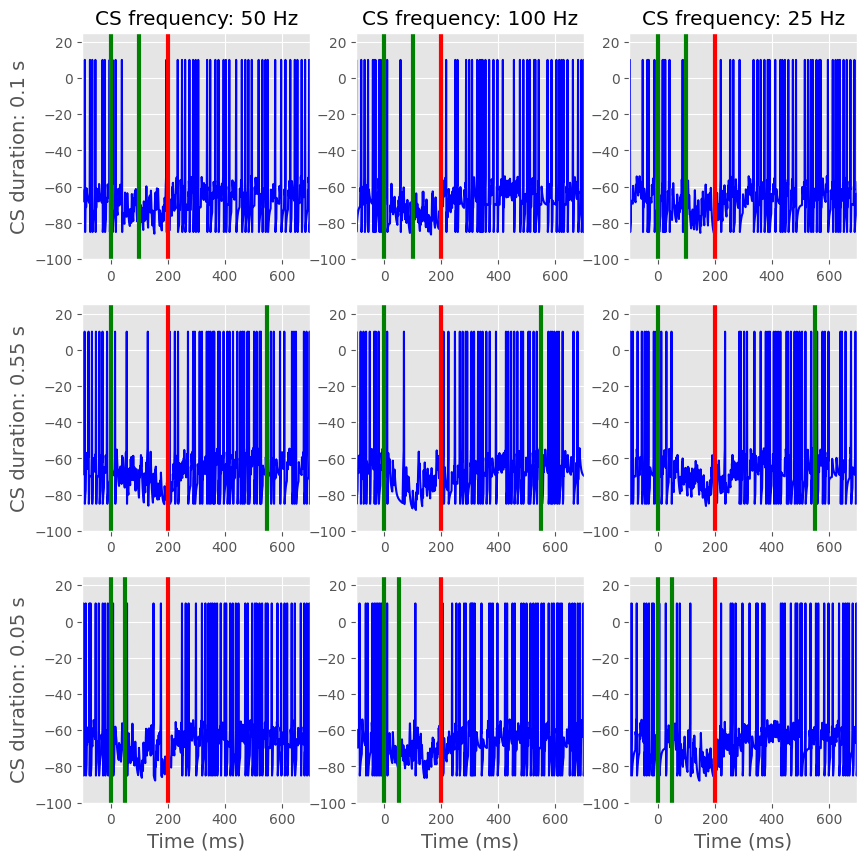

In [16]:
fig, axes = plt.subplots(3,3,figsize=(10,10))
fig_save_dir = '../figures'
ensure_dir(fig_save_dir)
import pdb

counter = 0
plot_times = np.arange(-100,10000)
for CSo in probe_CS_offsets:
    for CSf in probe_CS_freqs:
        potential = probe_V[counter][-1]
        ax = axes.reshape(-1)[counter]
        ax.plot(plot_times, potential, color='b')
        ax.axvline(x=(CS_onsets[0] * 1000), color='g', linewidth=3)
        ax.axvline(x=((CS_onsets[0] + CSo) * 1000), color='g', linewidth=3)
        ax.axvline(x=(US_onsets[0] * 1000), color='r', linewidth=3)
        ax.set_xlim([-100, US_onsets[0] * 1000 + 500])
        ax.set_ylim([-100,25])
#         pdb.set_trace()
        counter += 1
        
for a, ax in enumerate(axes[0,:]):
    ax.set_title('CS frequency: {} Hz'.format(probe_CS_freqs[a]))
    
for a, ax in enumerate(axes[:,0]):
    ax.set_ylabel('CS duration: {} s'.format(probe_CS_offsets[a]), fontsize=14)
    
for a, ax in enumerate(axes[-1,:]):
    ax.set_xlabel('Time (ms)'.format(probe_CS_offsets[a]), fontsize=14)
    
plt.savefig(os.path.join(fig_save_dir, 'probe_vary.pdf'))
  
plt.show()
plt.close()

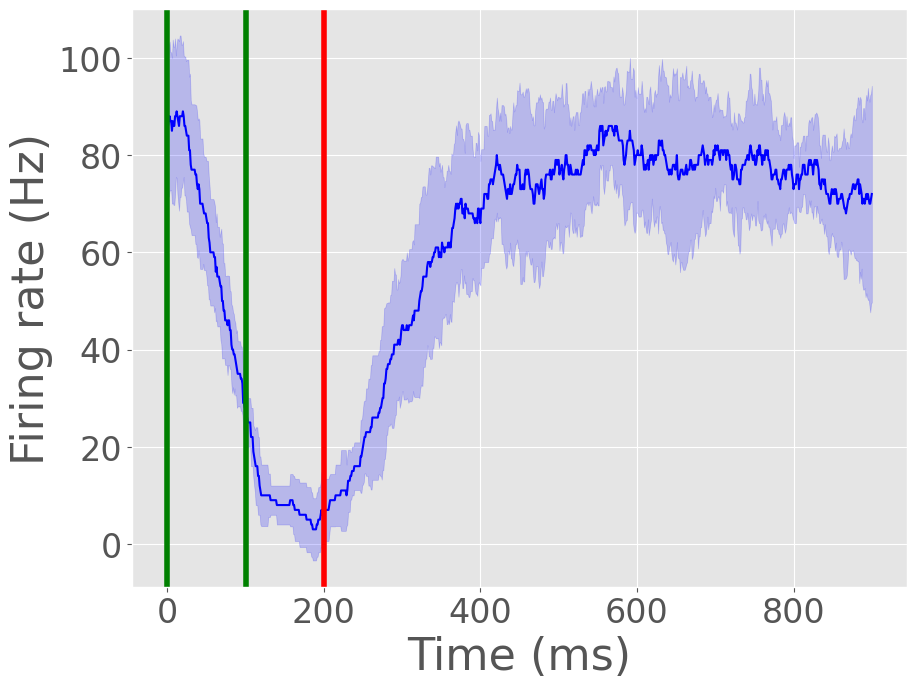

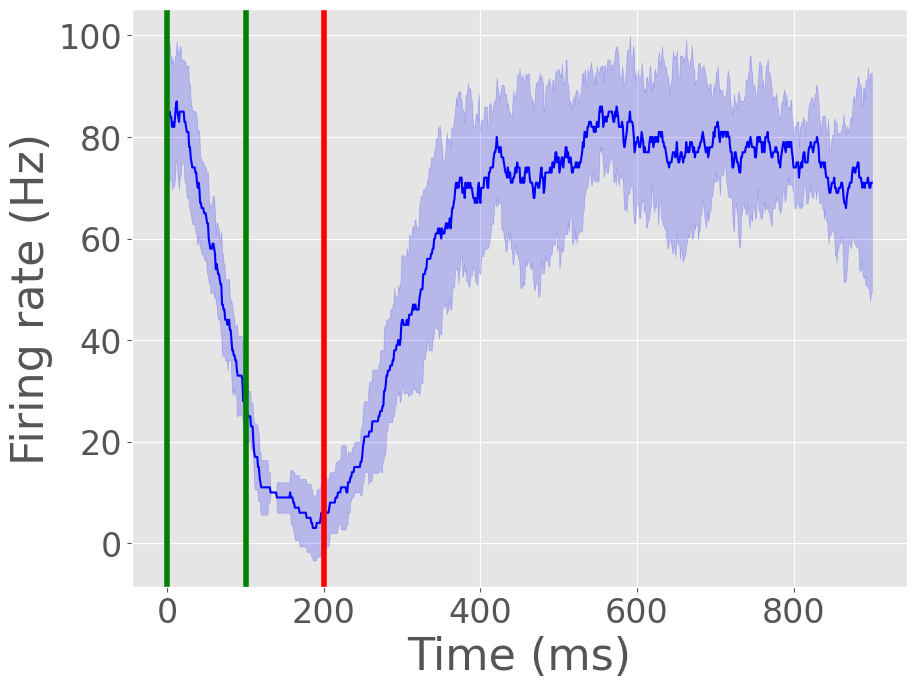

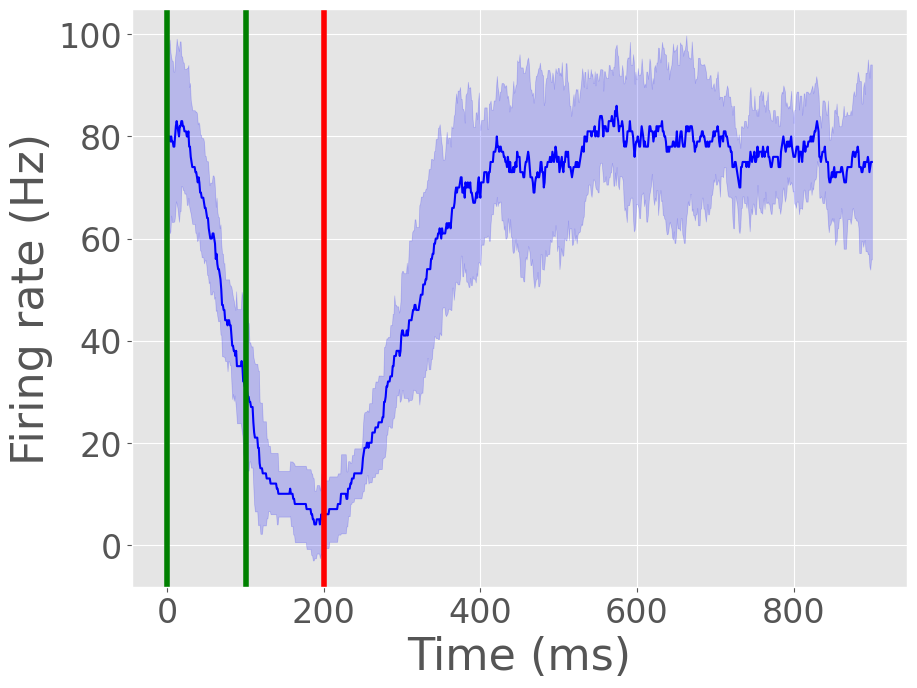

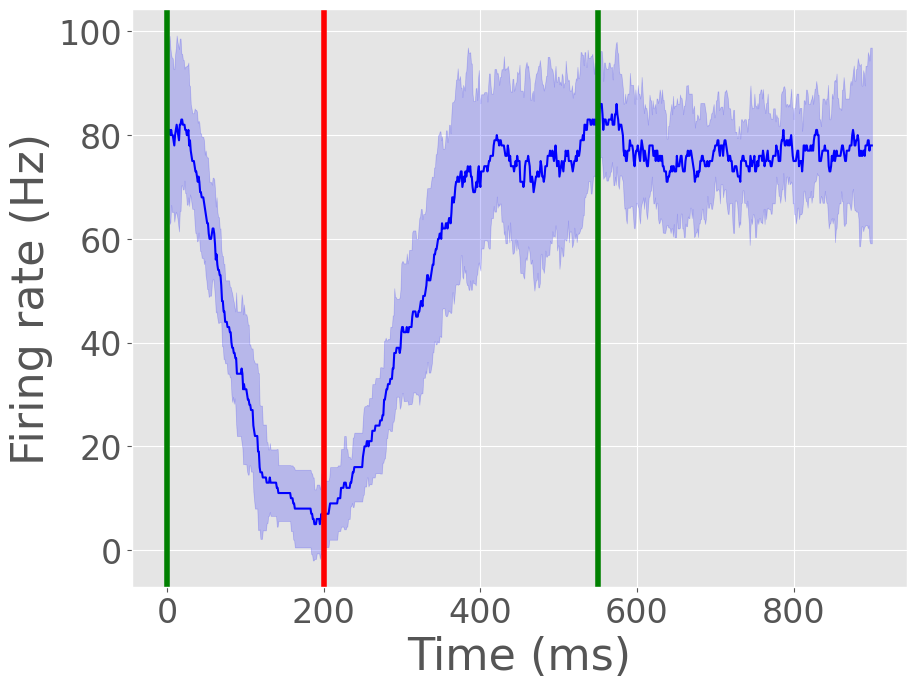

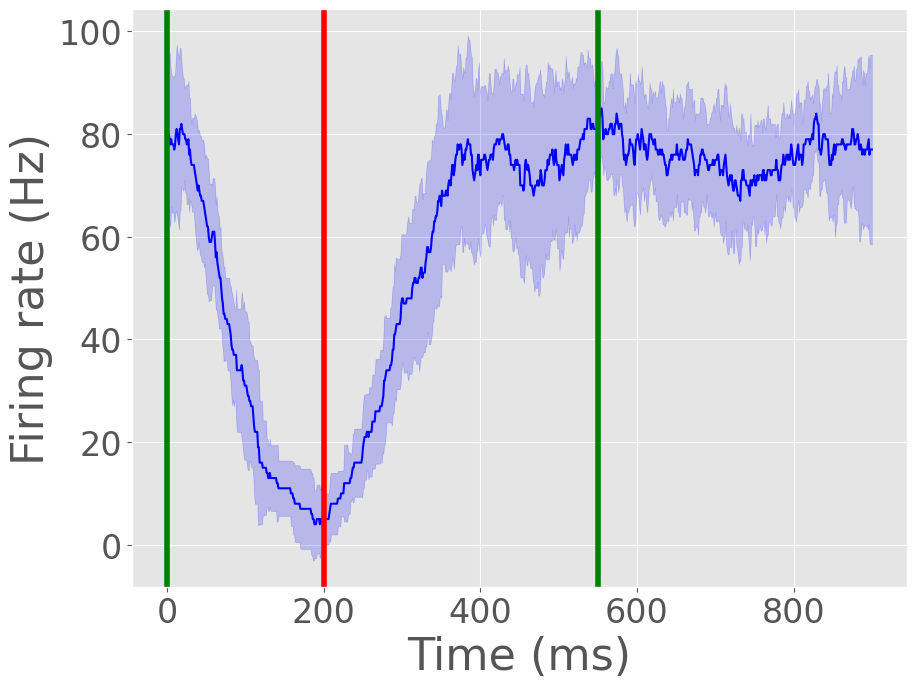

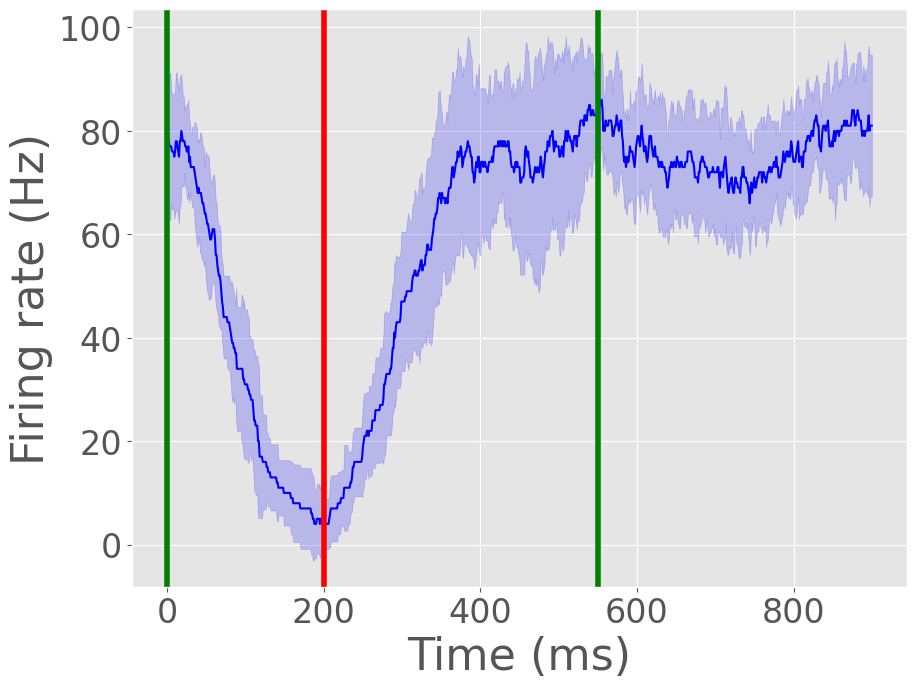

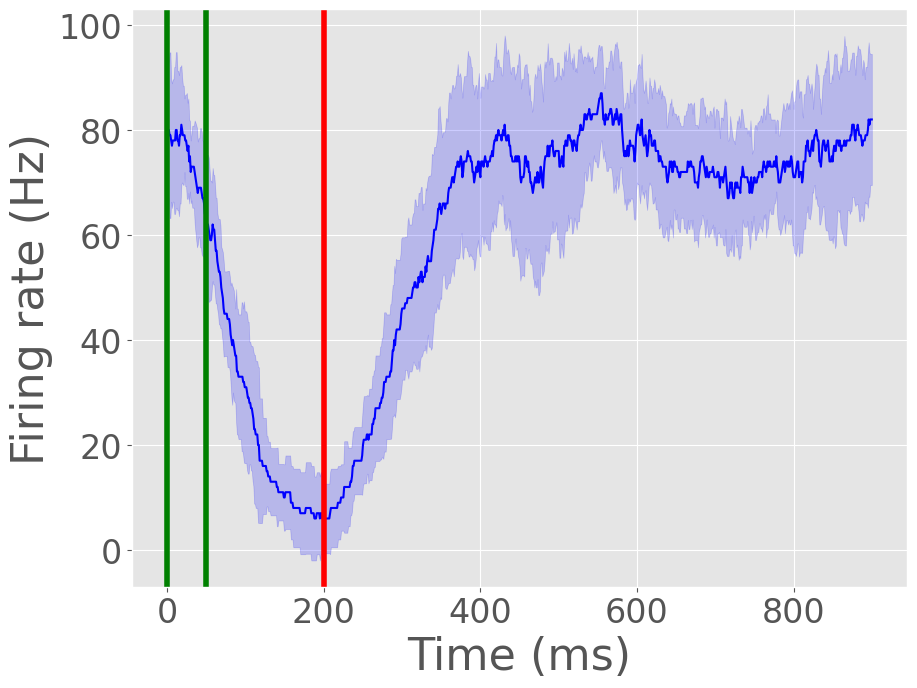

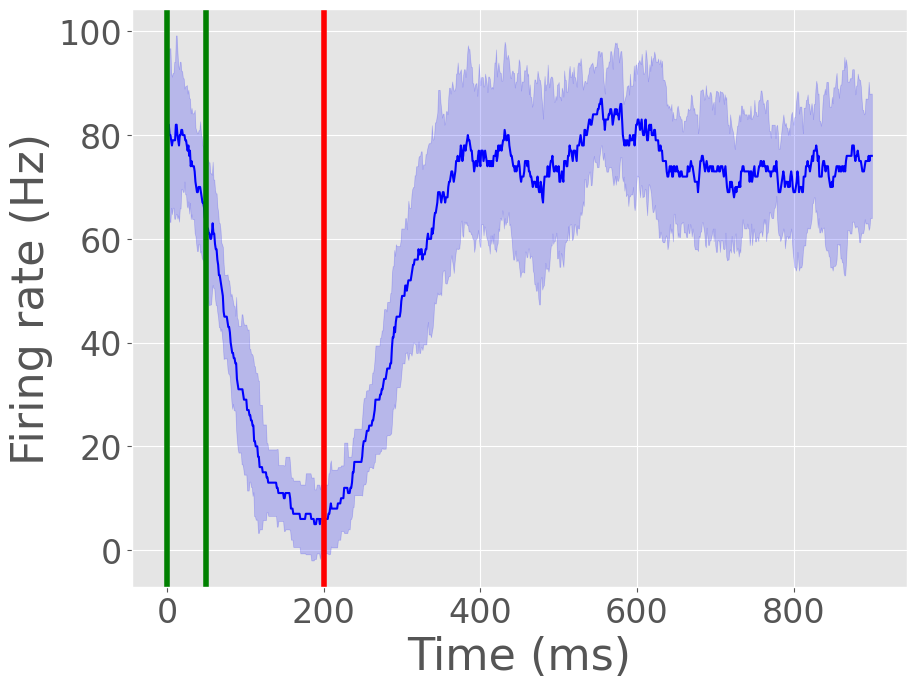

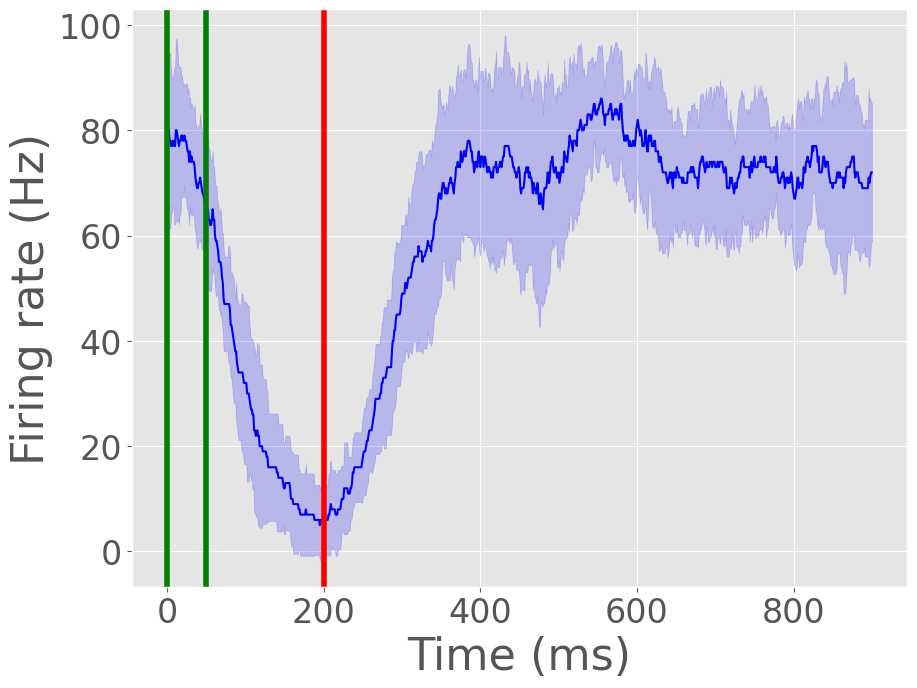

In [17]:
CS_onsets=[0.0]
CS_offsets=[0.3] #[0.35]
US_onsets=[0.2] #[0.2]
US_offsets=[0.23] #[0.3]

probe_CS_offsets = [.1,.55,.05]
probe_CS_freqs   = [50,100,25]

counter = 0
for CSo in probe_CS_offsets:
    for CSf in probe_CS_freqs:
        
        potentials = probe_V[counter][:,:1000]
        save_path = os.path.join(fig_save_dir, f'probe_vary_cso_{CSo}_csf_{CSf}.pdf')
        plot_avg_fr(potentials, pk.V_spike, [0.0], [CSo],
                    US_onsets, save_path, bin_width=100)
        counter += 1